In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_io as tfio

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

import csv

In [2]:
def decodeAudio(audioBinary):
    audio = tfio.audio.decode_mp3(audioBinary)
    return tf.squeeze(audio, axis=-1)

In [3]:
def getWaveform(filePath):
    audioBinary = tf.io.read_file(filePath)
    waveform = decodeAudio(audioBinary)
    return waveform

In [4]:
waveform=getWaveform('gdrive/MyDrive/cv-corpus-6.1-2020-12-11/ro/clips/common_voice_ro_20348817.mp3')

In [5]:
display.Audio(waveform, rate=48000)

In [6]:
def getSpectrogram(waveform):
    # Padding for files with less than 16000 samples
    zeroPadding = tf.zeros([waveform.shape[0]] - tf.shape(waveform), dtype=tf.float32)

    # Concatenate audio with padding so that all audio clips will be of the 
    # same length
    waveform = tf.cast(waveform, tf.float32)
    equalLength = tf.concat([waveform, zeroPadding], 0)
    spectrogram = tf.signal.stft(
      equalLength, frame_length=255, frame_step=128)

    spectrogram = tf.abs(spectrogram)

    return spectrogram

In [7]:
def plotSpectrogram(spectrogram, ax):
    # Convert to frequencies to log scale and transpose so that the time is
    # represented in the x-axis (columns).
    logSpec = np.log(spectrogram.T)
    height = logSpec.shape[0]
    width = logSpec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, logSpec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


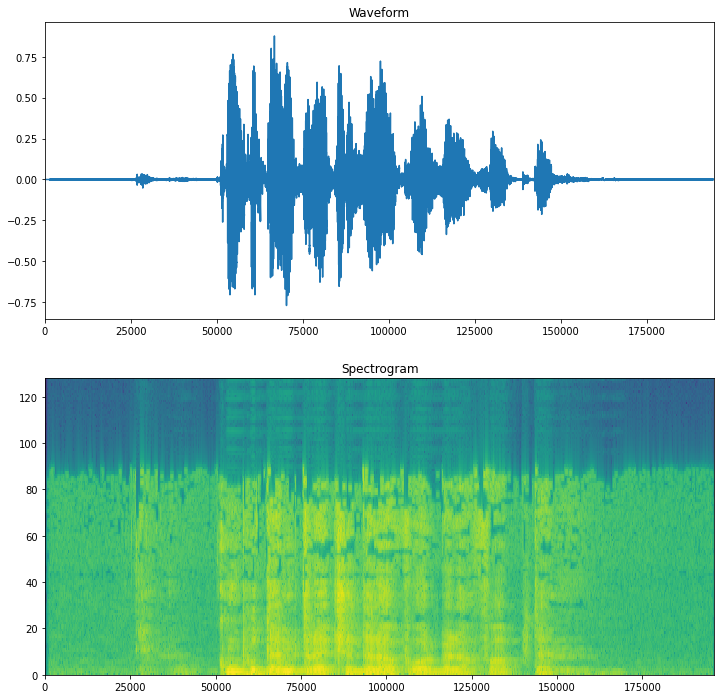

In [8]:
fig, axes = plt.subplots(2, figsize=(12, 12))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, waveform.shape[0]])
spectrogram=getSpectrogram(waveform)
plotSpectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()
plt.close("all")

In [9]:
def getMP3FileNames(filePath):
    rez=dict()
    with open(filePath,'r',encoding='utf8') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        next(reader)#skip header
        for row in reader:
            mp3FileName = row[1]
            label = row[2]
            rez[mp3FileName] = label
    return rez

In [10]:
mp3TrainFileNames=getMP3FileNames('gdrive/MyDrive/cv-corpus-6.1-2020-12-11/ro/train.tsv')

In [11]:
def saveSpectrogram(destinationFolder,spectrogram,spectrogramTitle,spectrogramName):
    fig, axes = plt.subplots(1, figsize=(12, 12))
    axes.set_title('Spectrogram for ' + spectrogramTitle)
    plotSpectrogram(spectrogram.numpy(), axes)
    fileName=str(spectrogramName.split(".")[0])+".jpg"
    plt.savefig(destinationFolder+"/"+fileName)
    plt.close("all")

In [14]:
def createSpectrograms(sourceFolder,destinationFolder,mp3FileNames):
    i=0
    for file in os.listdir(sourceFolder):
        if file in mp3FileNames:
            i+=1
            if i > 824:
              waveform=getWaveform(sourceFolder+"/"+file)
              spectogram=getSpectrogram(waveform)
              saveSpectrogram(destinationFolder,spectogram,mp3FileNames[file],file)

In [16]:
createSpectrograms(sourceFolder="gdrive/MyDrive/cv-corpus-6.1-2020-12-11/ro/clips", destinationFolder="gdrive/MyDrive/spectrograms/train",mp3FileNames=mp3TrainFileNames)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
